# K Nearest Neighbors (KNN)  

This is a classified dataset where we don't know anything about the data. We just want to make predictions based on the features available.

## How KNN Works
- The KNN algorith works by looking at an observation point and identifies all other neighbours.
- It calculates the distance to these neighbours and puts it into a list and sorts it. 
- The list is checked and the labels for the top K elementes are returned. So if K=5, then it will look at the top 5 points in that list and takes the mean. 
- This algorithm relies on the distance between points, therefore if your data is not scaled, then larger values will  lead to larger distances from the observation point and therefore be misclassified.

In the graph below we can see how changing the cluster size (K), affects the classification of the point. 
- A **smaller K** size means that not enough points are looked at which leads to **low bias** but **high variance**.
- A **larger K** size means that the model is too generalised and has a larger reach which leads to underfitting the data which can lead to **high bias** but **low variance**.
<br>

<img src="KNN.png" width="400" height="400" align="left">

<br>

**Advantages**
- Simple and easy to interpret.
- Works well on classification with multiple classes.
- Versatile (works on classifcation and regression).

**Disadvantages**
- It takes a long time to run when you have more data points since the model needs to store every data point. 
- The model is sensitive to outliers since the distance matters.



**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Reading the Data


In [2]:
df=pd.read_csv("KNN_Project_Data")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


Here we can see that the different features have different ranges. When we use a KNN algorithm we want to make sure that the data is scaled so that it doesn't mess up our algorithm. 

This is because the KNN model predicts the class of a given point by identifying other points that are closeset it. Therefore data that is on a large scale will have a larger distance and affect the model more. 



## 2. Data processing

### Standardize the Variables



In [4]:
from sklearn.preprocessing import StandardScaler

Create a StandardScaler() object called scaler.

In [5]:
scaler = StandardScaler()

Fit scaler to the features.

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

Use the .transform() method to transform the features to a scaled version.

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [8]:
scaled_df = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## 3. Creating the model

Use train_test_split to split your data into a training set and a testing set.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = scaled_df
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

### Using KNN model

Import KNeighborsClassifier from scikit learn.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Create a KNN model instance with n_neighbors=1

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

Fit this KNN model to the training data.

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Use the predict method to predict values using your KNN model and X_test.

In [14]:
pred = knn.predict(X_test)

C:\Users\pate8284\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 4. Evaluating the model

Create a confusion matrix and classification report.

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

Print confusion matrix

In [16]:
print(confusion_matrix(y_test,pred))

[[110  36]
 [ 47 107]]


Print classification report

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



We can see that our model is **72% accurate** which is not very good. Lets try and improve this!

## 6. Choosing a K Value using the elbow method

Since we started off with a K value of 1 meaning that the model will only look at the closest point, we should increase our k value until we find one that produces the least error whilst also not being very large so to decrease the time it takes to run our algorithm.


Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

In [18]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
#add the mean to the error rate list when our predictions are not equal to the actual values otherwise there'll be no error!
    error_rate.append(np.mean(pred_i != y_test))
    

C:\Users\pate8284\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pate8284\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

Plotting the data


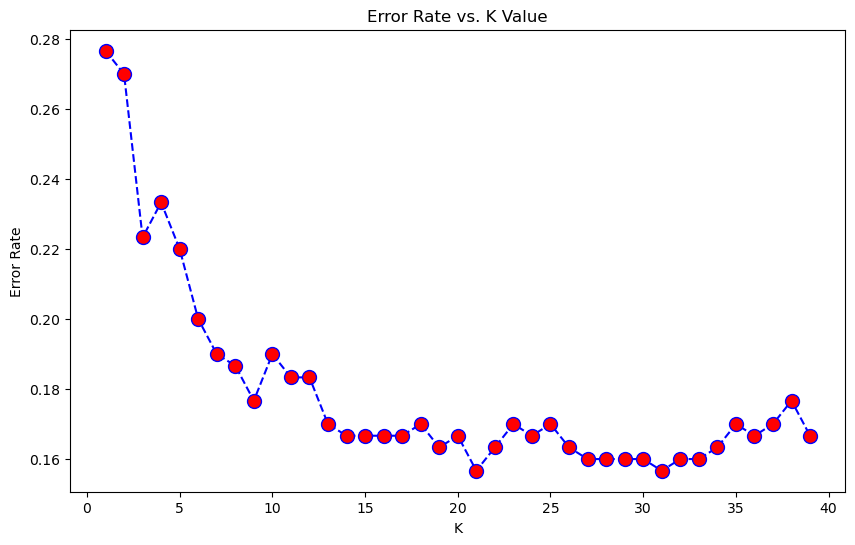

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

We can see now that the error rate is best at around K=21 so lets choose this and see how our model performs

### Retrain with K=21

In [21]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21


[[125  21]
 [ 26 128]]


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.86      0.83      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



C:\Users\pate8284\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Our model is now **84% accurate** which is much better!